In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Find out how many movies user 2 has watched
User 2 has watched 29 movies in total and left reviews. I used the userId column and `loc` to query each review left by user 2 and the `count` method to find the number of movies watched.

In [6]:
ratings.loc[ratings['userId'] == 2].count()

userId       29
movieId      29
rating       29
timestamp    29
dtype: int64

# Plot a bar chart of their movie ratings
Here, I tried to play with the bar graph. First, I plotted the bar graph of ratings of each movieId, then I plotted the counts of the number of unique ratings. 

In [40]:
new_df = ratings[ratings['userId'] == 2]
sorted_df = new_df.set_index('movieId')
new_index_df = new_df.set_index('rating')
new_sorted_df = new_index_df.sort_index()

<Axes: xlabel='movieId'>

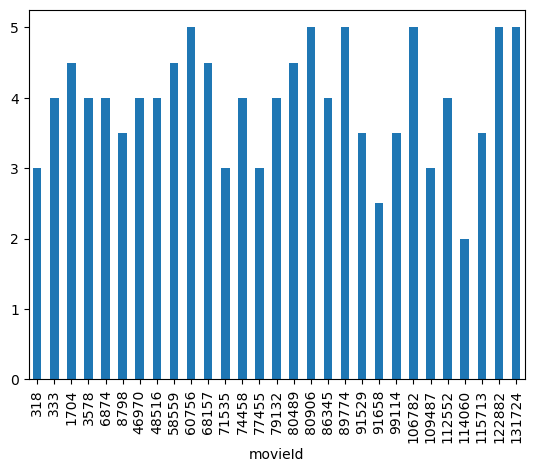

In [41]:
sorted_df['rating'].plot.bar()

<Axes: >

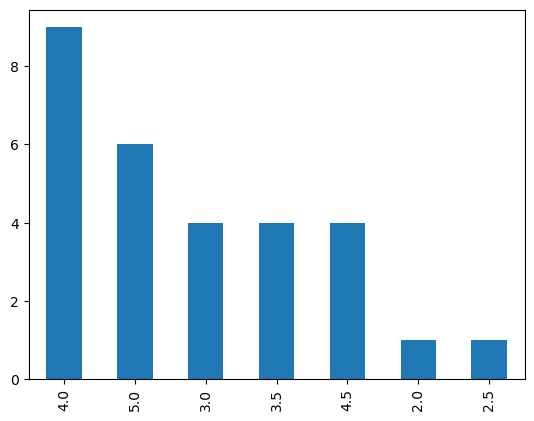

In [42]:
new_sorted_df.index.value_counts().plot.bar()

In [43]:
pd.to_datetime(ratings['timestamp'], unit='s')

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]

# Find out user 2's top movies
User 2 has left 5 star reviews for 6 movies. We will need more data to find out which movie is the best one, but choosing any of these 6 movies can't go wrong. On the next cell, we display the title of the top movies using the `merge` method by movieId.

In [44]:
ratings.loc[ratings['userId'] == 2].sort_values(by='rating', ascending=False)

,userId,movieId,rating,timestamp
260,2,131724,5.0,1445714851
259,2,122882,5.0,1445715272
254,2,106782,5.0,1445714966
250,2,89774,5.0,1445715189
241,2,60756,5.0,1445714980
248,2,80906,5.0,1445715172
234,2,1704,4.5,1445715228
240,2,58559,4.5,1445715141
242,2,68157,4.5,1445715154
247,2,80489,4.5,1445715340


In [45]:
ratings[ratings['userId'] == 2].merge(movies, on='movieId').sort_values(by='rating', ascending=False)

,userId,movieId,rating,timestamp,title,genres
28,2,131724,5.0,1445714851,The Jinx: The Life and Deaths of Robert Durst ...,Documentary
27,2,122882,5.0,1445715272,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller
22,2,106782,5.0,1445714966,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
18,2,89774,5.0,1445715189,Warrior (2011),Drama
9,2,60756,5.0,1445714980,Step Brothers (2008),Comedy
16,2,80906,5.0,1445715172,Inside Job (2010),Documentary
2,2,1704,4.5,1445715228,Good Will Hunting (1997),Drama|Romance
8,2,58559,4.5,1445715141,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
10,2,68157,4.5,1445715154,Inglourious Basterds (2009),Action|Drama|War
15,2,80489,4.5,1445715340,"Town, The (2010)",Crime|Drama|Thriller


# Find the most similar user in the movie dataset to user 2
In order to find the most similar user to user 2, we calculated the euclidean distance and the cosine distance metrics using the `pdist` function from `scipy`.

In [222]:
wide = ratings.pivot(index='userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We first fill the null values with -1. We used pdist rather the `corr` function because it's faster to calculate it.

In [223]:
wide.fillna(-1, inplace=True)

In [224]:
from scipy.spatial.distance import pdist, squareform

In [225]:
euclidean_distances = squareform(pdist(wide, metric='euclidean'))

In [226]:
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)

In [227]:
euclidean_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


Using the euclidean distance metric, we can see that the user 442 is the most similar to user 2, then users 461 and 189.

In [228]:
euclidean_df.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

In [230]:
euclidean_df.loc[2].sort_values().loc[442]

29.0

Using the cosine distance metric, we again confirm that the users 461 and 189 are the most similar after user 442. 

In [231]:
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[2].sort_values()

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

In [233]:
cosine_df.loc[2].sort_values().loc[442]

0.04202531643895069

# Recommend a few movies for user 2 using similarity metrics
Since user 442 is the most similar to user 2 by our metric, we should recommend movies rated highly by user 442 to user 2. However, when we look at the movie ratings made by user 442, we see that there are no ratings higher than 2.5. This means that we can't recommend movies to user 2 from user 442's preferences. Therefore, we choose user 461 who is the next most similar user to user 2.

In [234]:
ratings.loc[ratings['userId'] == 442].sort_values(by='rating', ascending=False)

,userId,movieId,rating,timestamp
68317,442,362,2.5,1331560498
68336,442,4361,2.5,1331560492
68319,442,524,2.0,1331560506
68329,442,2908,2.0,1331560472
68334,442,3752,2.0,1331560582
68327,442,2145,2.0,1331560550
68318,442,468,1.5,1331560538
68331,442,3363,1.5,1331560564
68321,442,616,1.5,1331560512
68323,442,1231,1.0,1331560577


In [244]:
ratings.loc[ratings['userId'] == 461].sort_values(by='rating', ascending=False)

,userId,movieId,rating,timestamp
71543,461,106782,5.0,1505935409
71520,461,356,5.0,1505935220
71519,461,318,4.5,1505935213
71541,461,99114,4.5,1505935404
71532,461,1784,4.5,1505935273
71529,461,1246,4.5,1505935259
71528,461,1213,4.0,1505935438
71539,461,74458,4.0,1505935413
71536,461,3147,4.0,1505935225
71535,461,2762,4.0,1505935252


# Choosing a method to recommend movies
Our method of recommending a movie is to look for movies that are rated highly by user 461 and not rated by user 2. I believe this is the best method to recommend movies unless user 2 and user 461 haven't left any reviews for their watched movies. We can see that user 461 rated movie number 356 or Forrest Gump highly, and user 2 hasn't left a review for that movie. So we recommend this movie to user 2.  

In [243]:
wide.loc[2].notna().equals(wide[461].notna())

False

In [242]:
rated_5_by_442_not_watched_by_2 = (wide.loc[461] == 5) & (wide.loc[2] == -1)
print(wide.loc[2][rated_5_by_442_not_watched_by_2])
print(wide.loc[461][rated_5_by_442_not_watched_by_2])

movieId
356   -1.0
Name: 2, dtype: float64
movieId
356    5.0
Name: 461, dtype: float64


In [246]:
movies[movies['movieId'] == 356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
